In [275]:
import vizdoom as vzd
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import sys
sys.path.append('../DataGeneration')

from matplotlib import pyplot as plt
from local_map import look_around
from local_map import map_to_black


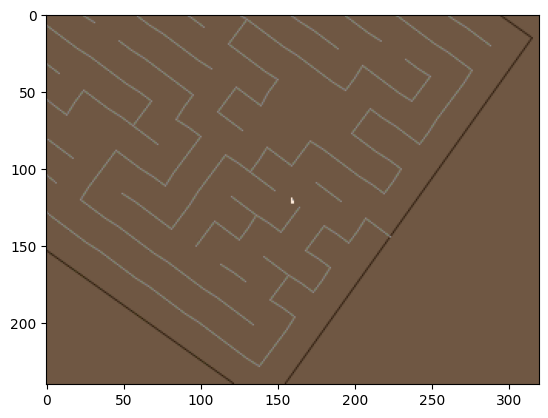

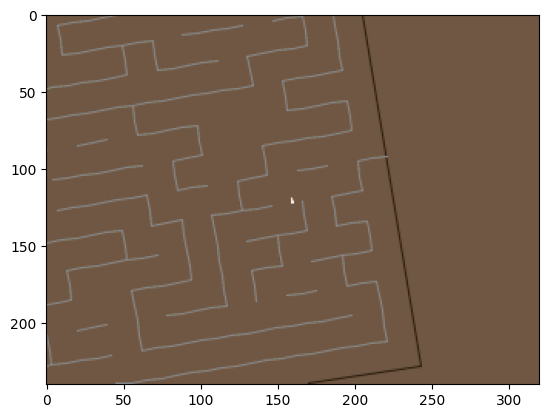

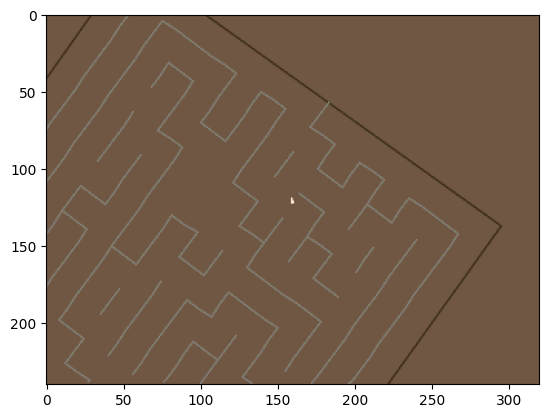

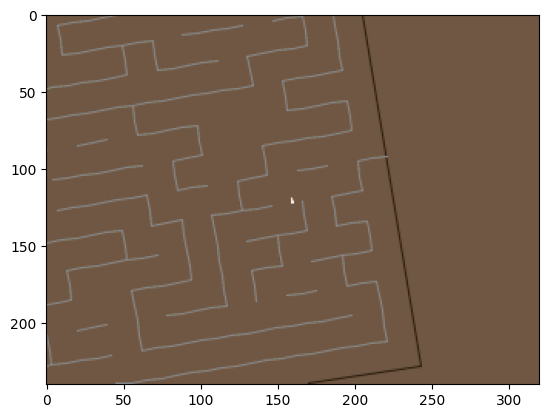

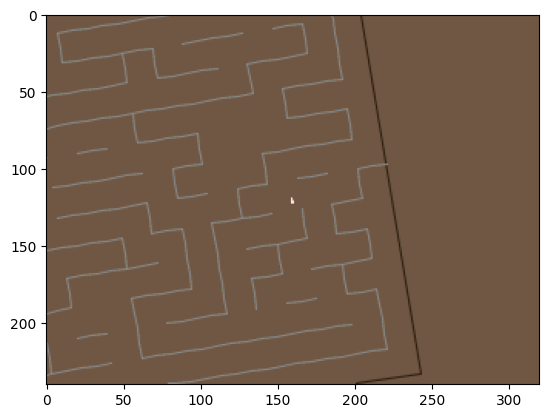

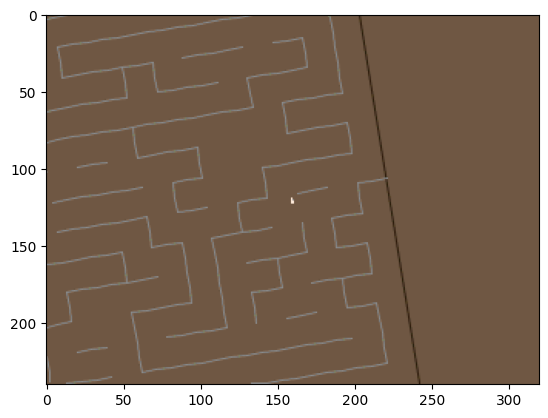

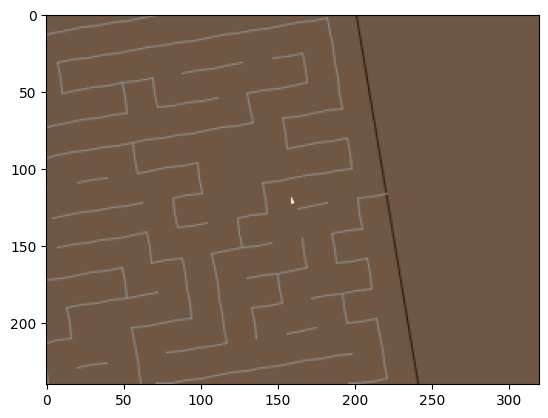

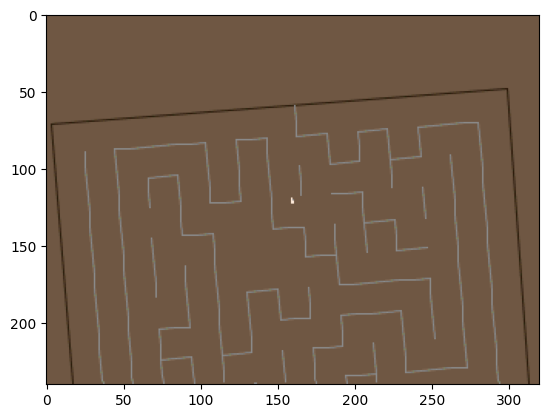

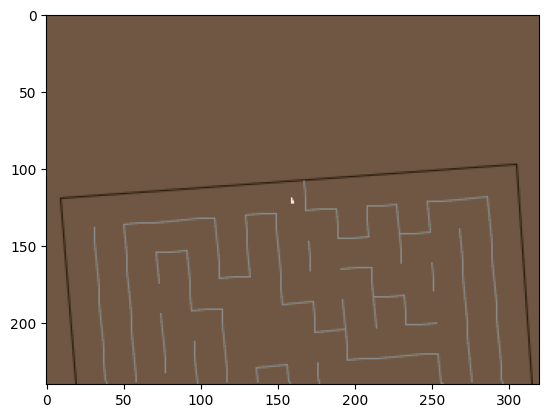

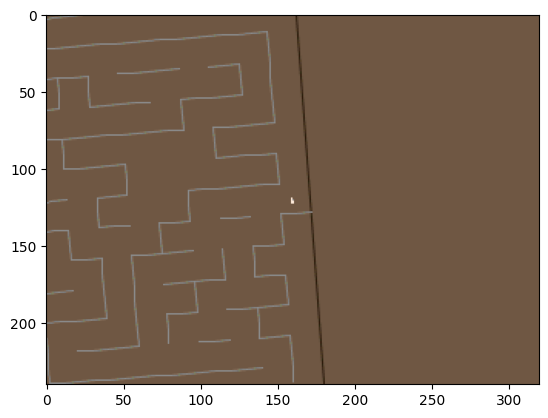

In [308]:
game = vzd.DoomGame()
game.load_config('../data/resources/datagen.cfg')
game.set_doom_scenario_path('../data/maps_1key_noaug/30x30.wad')

game.set_automap_mode(vzd.AutomapMode.WHOLE)
game.set_seed(125)
game.set_render_hud(False)
game.set_objects_info_enabled(True)
game.set_screen_format(vzd.ScreenFormat.RGB24)
game.set_labels_buffer_enabled(True)
game.set_render_corpses(True)
game.set_doom_map('map03')
game.init()
game.new_episode()

start_pos = map_to_black(game.get_state().automap_buffer)
# я хуй знает чо тут происходит

N = 80 * 5 / 2 # я пытался 
frames = 10
maps = []
vars = []
# for i in range(int(N)):
# собираю список состояний игры
# for i in range(20):
#     game.new_episode()
#     # print(i)
#     # start_state = game.get_state()
#     # start_state = start_state.game_variables
#     fwd = np.random.randint(-10, 10)
#     side = np.random.randint(-10, 10)
#     action = [0,0, 0, fwd, side] # тупо иду вперед не взирая ни на что
#     map, var = make_action(game, action, frames)
#     maps.append(map)
#     vars.append(var)
  
#     ang_range = 170 # можно настраивать
#     ang = random.randint(-ang_range, ang_range)
#     action = [0,0, ang, 0, 0]
#     map, var = make_action(game, action, 1)
#     maps.append(map)
#     vars.append(var)
#     time.sleep(0.01)

st = game.get_state()
gt_map = st.automap_buffer
plt.imshow(gt_map)
plt.show()

maps.append(look_around(st))
vars.append(st.game_variables)

game.make_action([0,0, 45, 0, 0], 1)
st = game.get_state()
gt_map = st.automap_buffer
plt.imshow(gt_map)
plt.show()
maps.append(look_around(st))
vars.append(st.game_variables)

game.make_action([0,0, 45, 0, 0], 1)
st = game.get_state()
gt_map = st.automap_buffer
plt.imshow(gt_map)
plt.show()
maps.append(look_around(st))
vars.append(st.game_variables)

game.make_action([0,0, -45, 0, 0], 1)
st = game.get_state()
gt_map = st.automap_buffer
plt.imshow(gt_map)
plt.show()
maps.append(look_around(st))
vars.append(st.game_variables)

game.make_action([0,0, 0, 20, 0], 15)
st = game.get_state()
gt_map = st.automap_buffer
plt.imshow(gt_map)
plt.show()
maps.append(look_around(st))
vars.append(st.game_variables)

game.make_action([0,0, 0, 20, 0], 15)
st = game.get_state()
gt_map = st.automap_buffer
plt.imshow(gt_map)
plt.show()
maps.append(look_around(st))
vars.append(st.game_variables)

game.make_action([0,0, 0, 20, 0], 15)
st = game.get_state()
gt_map = st.automap_buffer
plt.imshow(gt_map)
plt.show()
maps.append(look_around(st))
vars.append(st.game_variables)

game.make_action([0,0, 85, 0, 0], 1)
st = game.get_state()
gt_map = st.automap_buffer
plt.imshow(gt_map)
plt.show()
maps.append(look_around(st))
vars.append(st.game_variables)

game.make_action([0,0, 0, 20, 0], 80)
st = game.get_state()
gt_map = st.automap_buffer
plt.imshow(gt_map)
plt.show()
maps.append(look_around(st))
vars.append(st.game_variables)

game.make_action([0,0, -90, 0, 0], 1)
st = game.get_state()
gt_map = st.automap_buffer
plt.imshow(gt_map)
plt.show()
maps.append(look_around(st))
vars.append(st.game_variables)





In [303]:
def make_action(game, action, frames):
    game.make_action(action, frames)
    st = game.get_state()
    map = look_around(st)
    var = st.game_variables

    return map, var

def map_to_pts(map):
    # map image has 0, 0 at top left. We will shift it to bottom left
    # also we shift center of the image to (0, 0)
    pts = []
    center = np.array(map.shape) // 2
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):
            if map[i, j] == 0:
                pts.append((map.shape[0] - i, j) - center)
    return pts

def pts_to_map(pts):
    # Find the maximum absolute coordinates to determine map size
    max_x = max(abs(pt[0]) for pt in pts)
    max_y = max(abs(pt[1]) for pt in pts)
    
    # Add some padding and make sure dimensions are large enough for all points
    size_x = max_x + 2
    size_y = max_y + 2
    map = np.full((int(size_x), int(size_y)), 255)
    for pt in pts:
        # Shift coordinates to be non-negative
        x = -int(pt[0])
        y = int(pt[1])
        map[x, y] = 0
    return map

def rot_pts(pts, ang):
    ang = np.radians(ang)
    rot_matrix = np.array([[np.cos(ang), np.sin(ang)],
                          [-np.sin(ang), np.cos(ang)]])
    return (rot_matrix @ pts.T).T


[1211.89759827  684.15872192]
[1211.89759827  684.15872192]
[1211.89759827  684.15872192]
[1211.89759827  684.15872192]
[1261.50845337  676.05712891]
[1348.97872925  661.77282715]
[1445.09674072  646.07633972]
[1450.98748779  645.11433411]
[1472.68940735  168.25053406]
[1472.23782349  162.22814941]


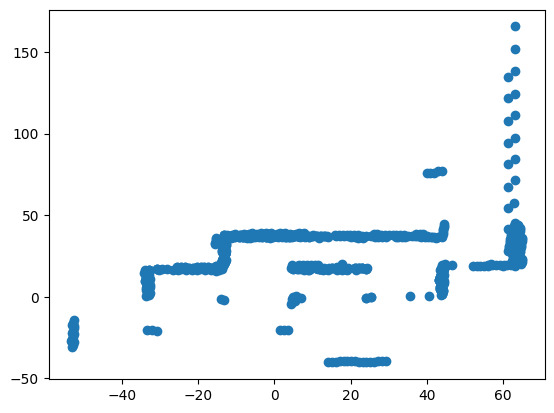

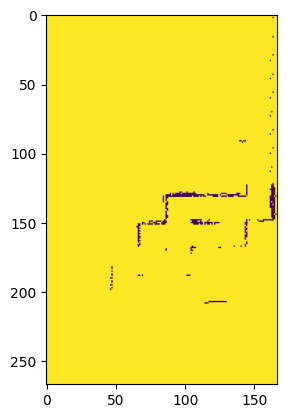

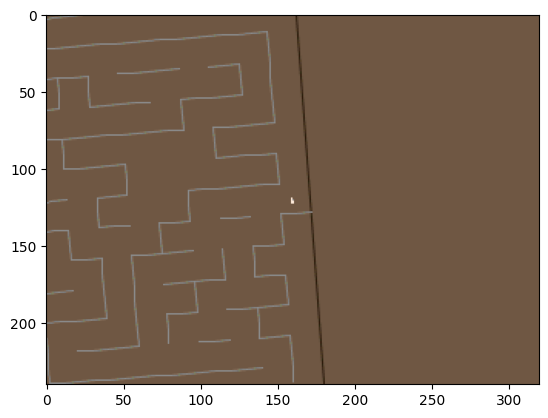

In [313]:
start_ang = vars[0][3]
start_coords = np.array(vars[0][:2])
#start_coords = np.array([start_coords[1], start_coords[0]])
global_pts = []

for i in range(len(maps)):
    pts = np.array(map_to_pts(maps[i]))
    coords = np.array(vars[i][:2])
    #coords = np.array([coords[1], coords[0]])
    ang = vars[i][3]  # Get relative angle from start
    coords_diff = coords - start_coords
    
    # First rotate points based on agent's rotation
    pts = rot_pts(pts, ang)
    coords_diff = coords_diff * np.array([-1, 1])
    # Then translate based on agent position
    pts = pts - coords_diff*(1/10)
    print(coords)
    global_pts.extend(pts)

plt.scatter([p[1] for p in global_pts], [p[0] for p in global_pts])
plt.show()
global_map = pts_to_map(global_pts + np.array((100, 100)))
plt.imshow(global_map)
plt.show()

plt.imshow(gt_map)
plt.show()

In [279]:
pts = map_to_points(maps[0])
plt.imshow(maps[0])
plt.show()

plt.scatter([p[1] for p in pts], [p[0] for p in pts])
plt.show()

pts = np.array(pts) + np.array((100, 100))
mp = points_to_map(pts)
plt.imshow(mp)
plt.show()



NameError: name 'map_to_points' is not defined